

> Investigacion sobre salud(Covid-19) (Clasificacion)



In [ ]:
#Importacion de librerias.
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
print('Librerias Importadas')

Librerias Importadas


In [ ]:
dataset = pd.read_csv('/content/2.COVID19_clasificacionnn.csv')  
print(dataset.shape[1]) 
dataset.head()

18


,Number,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,AstheniaE,Leukopenia,Exposure to Covid-19 patients,High risk zone,Temp,Blood Test,RT-PCR,History,Decisionlabel
0,1,80,Male,Yes,Yes,Yes,*,*,*,*,*,*,*,*,*,*,*,COVID-19
1,2,62,Male,Yes,*,Yes,Yes,97,0.75,Yes,*,*,*,*,*,*,*,COVID-19
2,3,57,Male,Yes,*,Yes,Yes,*,*,*,*,Yes,*,*,*,*,*,COVID-19
3,4,45,Male,Yes,*,Yes,Yes,*,*,*,Yes,Yes,*,*,*,*,*,COVID-19
4,5,63,Male,Yes,*,Yes,Yes,*,*,*,Yes,Yes,*,*,*,*,*,COVID-19




> Limpieza de dataset



In [ ]:
Age=dataset['Age'].replace(['*', ], '0')
Gender=dataset['Gender'].replace(['*', ], 'Undefined')
Fever=dataset['Fever'].replace(['*', ], '')
Dyspnea=dataset['Dyspnea'].replace(['*', ], '0')
Cough=dataset['Cough'].replace(['*', ], '0')
PO2=dataset['PO2'].replace(['*', ], '0')
CRP=dataset['CRP'].replace(['*', ], '0')
Leukopenia=dataset['Leukopenia'].replace(['*', ], '0')
ExposuretoCovid19patients=dataset['Exposure to Covid-19 patients'].replace(['*', ], '0')
Highriskzone=dataset['High risk zone'].replace(['*', ], '0')
Temp=dataset['Temp'].replace(['*', ], '0')
BloodTest=dataset['Blood Test'].replace(['*', ], '0')
RTPCR=dataset['RT-PCR'].replace(['*', ], '0')
History=dataset['History'].replace(['*', ], '0')
Decision_label=dataset['Decisionlabel']

In [ ]:
dataF=pd.concat([Age,Gender,Fever,Dyspnea,Cough,PO2,CRP,Leukopenia,ExposuretoCovid19patients,Highriskzone
,Temp,BloodTest,RTPCR,History,Decision_label], axis=1)
print(dataF)

    Age  Gender Fever Dyspnea  ... Blood Test RT-PCR History Decisionlabel
0    80    Male   Yes     Yes  ...          0      0       0      COVID-19
1    62    Male   Yes       0  ...          0      0       0      COVID-19
2    57    Male   Yes       0  ...          0      0       0      COVID-19
3    45    Male   Yes       0  ...          0      0       0      COVID-19
4    63    Male   Yes       0  ...          0      0       0      COVID-19
..   ..     ...   ...     ...  ...        ...    ...     ...           ...
125  62  Female    No       0  ...          0      0       0           Flu
126  63    Male   Yes       0  ...          0      0       0           Flu
127  63  Female   Yes       0  ...          0      0       0           Flu
128  40  Female    No       0  ...          0      0       0           Flu
129  78  Female    No       0  ...          0      0       0           Flu

[130 rows x 15 columns]


In [ ]:
print('Limpiando Ruido:')
dataF = dataF.dropna(subset=dataF.columns)
dataF

Limpiando Ruido:


,Age,Gender,Fever,Dyspnea,Cough,PO2,CRP,Leukopenia,Exposure to Covid-19 patients,High risk zone,Temp,Blood Test,RT-PCR,History,Decisionlabel
0,80,Male,Yes,Yes,0,0,0,0,0,0,0,0,0,0,COVID-19
1,62,Male,Yes,0,Yes,97,0.75,0,0,0,0,0,0,0,COVID-19
2,57,Male,Yes,0,Yes,0,0,0,Yes,0,0,0,0,0,COVID-19
3,45,Male,Yes,0,Yes,0,0,Yes,Yes,0,0,0,0,0,COVID-19
4,63,Male,Yes,0,Yes,0,0,Yes,Yes,0,0,0,0,0,COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,62,Female,No,0,Yes,0,0,0,No,Yes,38.3,0,0,0,Flu
126,63,Male,Yes,0,Yes,0,0,0,No,Yes,38.5,0,0,0,Flu
127,63,Female,Yes,0,Yes,0,0,0,No,Yes,39.3,0,0,0,Flu
128,40,Female,No,0,No,0,0,0,No,Yes,0,0,0,0,Flu


In [ ]:
#pasar la variable de salida categoricas a numericas
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
encoder=LabelEncoder()
#Utilizamos Encoder se utiliza si se va a convertir a numeros e importa el orden
dataF['Decisionlabel']=encoder.fit_transform(dataF.Decisionlabel.values)
print(dataF)

    Age  Gender Fever Dyspnea  ... Blood Test RT-PCR History Decisionlabel
0    80    Male   Yes     Yes  ...          0      0       0             0
1    62    Male   Yes       0  ...          0      0       0             0
2    57    Male   Yes       0  ...          0      0       0             0
3    45    Male   Yes       0  ...          0      0       0             0
4    63    Male   Yes       0  ...          0      0       0             0
..   ..     ...   ...     ...  ...        ...    ...     ...           ...
125  62  Female    No       0  ...          0      0       0             1
126  63    Male   Yes       0  ...          0      0       0             1
127  63  Female   Yes       0  ...          0      0       0             1
128  40  Female    No       0  ...          0      0       0             1
129  78  Female    No       0  ...          0      0       0             1

[129 rows x 15 columns]




> Comportamiento de los datos por variables



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


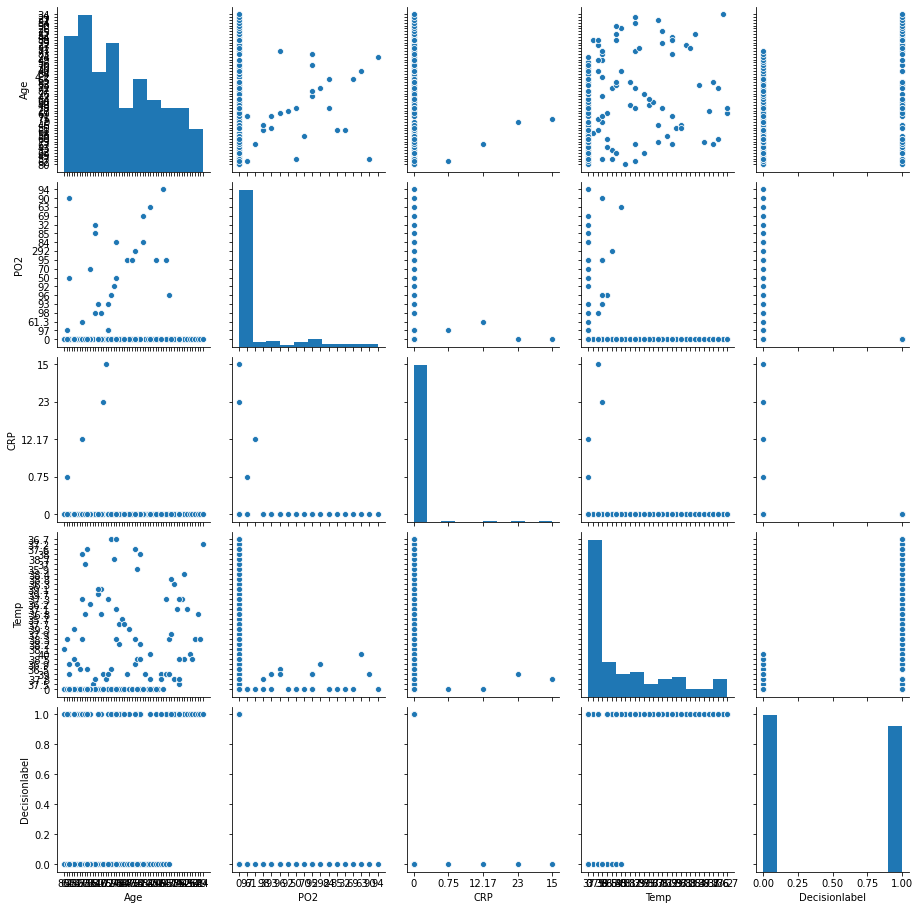

In [ ]:
import seaborn as sns
graphic=sns.pairplot(dataF)

In [ ]:
#Seleccionamos las variables escogidas

Xsubset = dataF[['Age','Gender','Fever','Dyspnea','Cough','PO2','CRP','Leukopenia','Exposure to Covid-19 patients','High risk zone','Temp'
,'Blood Test','RT-PCR','History']]

#para separar nuestra variable dependiente de la independiente, haremos lo siguiente:

y = dataF.Decisionlabel.values
print(Xsubset)
type(Xsubset)

    Age  Gender Fever Dyspnea  ...  Temp Blood Test RT-PCR History
0    80    Male   Yes     Yes  ...     0          0      0       0
1    62    Male   Yes       0  ...     0          0      0       0
2    57    Male   Yes       0  ...     0          0      0       0
3    45    Male   Yes       0  ...     0          0      0       0
4    63    Male   Yes       0  ...     0          0      0       0
..   ..     ...   ...     ...  ...   ...        ...    ...     ...
125  62  Female    No       0  ...  38.3          0      0       0
126  63    Male   Yes       0  ...  38.5          0      0       0
127  63  Female   Yes       0  ...  39.3          0      0       0
128  40  Female    No       0  ...     0          0      0       0
129  78  Female    No       0  ...  36.7          0      0       0

[129 rows x 14 columns]


pandas.core.frame.DataFrame



> Preprocesamiento de datos



In [ ]:
#PRIMERA FORMA DE PREPROCESAR

preprocesador1 = make_column_transformer(
    (StandardScaler(),['Age','PO2','CRP','Temp']),
    (OneHotEncoder(),['Gender','Fever','Dyspnea','Cough','Leukopenia','Exposure to Covid-19 patients','High risk zone','Blood Test','RT-PCR','History',]))

#ordinal(importa el orden): OneHotEncoder -> sistema binario
#nominal(No importa el orden, importa la clase o el nombre): Encoder Simple 

X = preprocesador1.fit_transform(Xsubset)
print(X.shape[1])
print(X.shape)

#print(X)

#print(preprocesador1)
categorical_features = ['Gender','Fever','Dyspnea','Cough','Leukopenia','Exposure to Covid-19 patients','High risk zone','Blood Test','RT-PCR','History',]
cnamesDataset1 = ['Age','PO2','CRP','Temp']
cnamesDataset2 = preprocesador1.transformers_[1][1].get_feature_names(categorical_features)
#print(cnamesDataset2)

cnamesDataset1.extend(cnamesDataset2)
print(cnamesDataset1)

DatasetPreprocesado = pd.DataFrame(data=X,columns=cnamesDataset1)
print(DatasetPreprocesado.head())

DatasetPreprocesado.to_csv("DatasetPreprocesado2.csv", sep=";",index = False) #sep es el separado, por defector es ","

37
(129, 37)
['Age', 'PO2', 'CRP', 'Temp', 'Gender_Female', 'Gender_Male', 'Gender_Undefined', 'Fever_', 'Fever_No', 'Fever_Yes', 'Dyspnea_0', 'Dyspnea_No', 'Dyspnea_Yes', 'Cough_0', 'Cough_No', 'Cough_Yes', 'Leukopenia_0', 'Leukopenia_Yes', 'Exposure to Covid-19 patients_0', 'Exposure to Covid-19 patients_No', 'Exposure to Covid-19 patients_No ', 'Exposure to Covid-19 patients_Yes', 'High risk zone_0', 'High risk zone_Yes', 'Blood Test_0', 'Blood Test_Leukocytosis', 'Blood Test_Leukopenia', 'RT-PCR_0', 'RT-PCR_Positive', 'History_0', 'History_Asthma', 'History_COPD', 'History_Chronic', 'History_Croonic', 'History_DM', 'History_Kidney cancer', 'History_None']
        Age       PO2  ...  History_Kidney cancer  History_None
0  1.100406 -0.454122  ...                    0.0           0.0
1  0.145498  1.854588  ...                    0.0           0.0
2 -0.119754 -0.454122  ...                    0.0           0.0
3 -0.756360 -0.454122  ...                    0.0           0.0
4  0.198549 



> Analisis de PCA con todos los componentes



In [ ]:
#Datamining: Clustering (método no supervisado de Machine Learning)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

from sklearn.cluster import KMeans

#Kmeans Clustering 
def doKmeans(X, nclust=4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(DatasetPreprocesado, 3)
kmeans = pd.DataFrame(clust_labels)
kmeans

,0
0,0
1,0
2,0
3,0
4,0
...,...
124,1
125,1
126,1
127,1


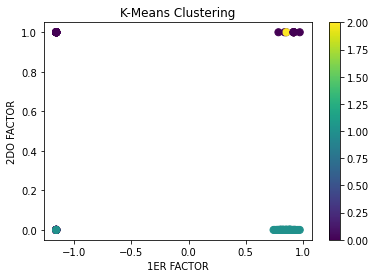

In [ ]:
#Visualización de grupos de usuarios en 2D
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(DatasetPreprocesado['Temp'],DatasetPreprocesado['Exposure to Covid-19 patients_0'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
plt.colorbar(scatter)

In [ ]:
# sin especificar el numero de componentes
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(DatasetPreprocesado)

principalDf = pd.DataFrame(data = principalComponents)

principalDf=round(principalDf, 2)
print(principalDf)

       0     1     2     3     4     5   ...   31   32   33   34   35   36
0    1.79 -0.59 -0.51 -1.32  0.04  0.78  ...  0.0  0.0  0.0  0.0 -0.0  0.0
1    1.97 -0.14  0.74  0.47 -0.89 -0.90  ... -0.0 -0.0 -0.0 -0.0  0.0 -0.0
2    0.85  0.26 -0.89 -0.57 -0.81 -0.85  ...  0.0 -0.0  0.0 -0.0 -0.0  0.0
3    0.83  0.71 -1.22 -0.20 -0.94 -0.94  ...  0.0  0.0 -0.0  0.0 -0.0 -0.0
4    0.90  0.08 -0.85 -0.77 -0.85 -1.01  ...  0.0  0.0 -0.0  0.0 -0.0  0.0
..    ...   ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...
124 -1.59 -0.30  0.16  0.13  0.55 -0.48  ... -0.0  0.0 -0.0  0.0 -0.0 -0.0
125 -1.25 -0.17  0.20 -0.38 -1.03 -0.01  ...  0.0 -0.0 -0.0  0.0 -0.0  0.0
126 -1.52 -0.18  0.24 -0.01 -0.23 -0.14  ...  0.0  0.0 -0.0  0.0  0.0  0.0
127 -0.58  0.36 -1.28  0.51  1.45 -0.66  ...  0.0 -0.0 -0.0  0.0  0.0 -0.0
128 -1.51 -1.02  0.41 -0.35  1.25  0.05  ... -0.0  0.0  0.0  0.0 -0.0  0.0

[129 rows x 37 columns]


In [ ]:
print('Componente 0')
np.corrcoef(principalDf[0], y)

Componente 0


array([[ 1.        , -0.92994521],
       [-0.92994521,  1.        ]])

In [ ]:
#The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.
explained_variance=pca.explained_variance_ratio_
explained_variance

array([2.78698933e-01, 1.66264660e-01, 1.26203623e-01, 1.07827498e-01,
       6.82239809e-02, 4.72973453e-02, 4.46509235e-02, 3.16220674e-02,
       2.61029918e-02, 1.93423203e-02, 1.68881439e-02, 1.48687158e-02,
       1.30038778e-02, 9.31487176e-03, 7.83335548e-03, 4.75906711e-03,
       3.93134760e-03, 3.48393770e-03, 2.56512189e-03, 1.99828504e-03,
       1.43152223e-03, 1.04672567e-03, 9.45182524e-04, 8.90437219e-04,
       8.05063853e-04, 5.49636732e-32, 1.33622940e-33, 1.33622940e-33,
       1.33622940e-33, 1.33622940e-33, 1.33622940e-33, 1.33622940e-33,
       1.33622940e-33, 1.33622940e-33, 1.33622940e-33, 1.33622940e-33,
       1.33622940e-33])

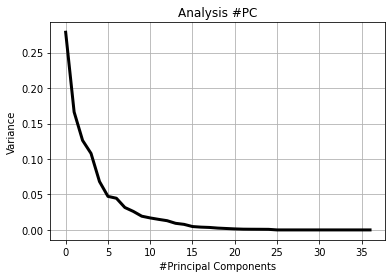

In [ ]:
num_components=37
a = range(num_components)
num_pc= a[::1]

#Visualize 2D Projection
import matplotlib.pyplot as plt

#plt.plot(num_pc, explained_variance)
plt.plot(num_pc, explained_variance, color='black', linestyle='solid', linewidth = 3, 
          markerfacecolor='black', markersize=8)
#plt.ylim((0,0.4))
plt.title('Analysis #PC')
plt.xlabel('#Principal Components')
plt.ylabel('Variance')
plt.grid()
plt.show()



> Analisis de PCA con 8 componentes



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(DatasetPreprocesado)

principalDf2 = pd.DataFrame(data = principalComponents)

principalDf2=round(principalDf2, 2)
print(principalDf2)

        0     1     2     3     4     5     6     7
0    1.79 -0.59 -0.51 -1.32  0.04  0.78 -0.30 -0.30
1    1.97 -0.14  0.74  0.47 -0.89 -0.90  0.26  0.49
2    0.85  0.26 -0.89 -0.57 -0.81 -0.85  0.12  0.27
3    0.83  0.71 -1.22 -0.20 -0.94 -0.94  0.15  0.17
4    0.90  0.08 -0.85 -0.77 -0.85 -1.01  0.01  0.19
..    ...   ...   ...   ...   ...   ...   ...   ...
124 -1.59 -0.30  0.16  0.13  0.55 -0.48 -0.07 -0.40
125 -1.25 -0.17  0.20 -0.38 -1.03 -0.01  0.15 -0.25
126 -1.52 -0.18  0.24 -0.01 -0.23 -0.14 -0.80  0.10
127 -0.58  0.36 -1.28  0.51  1.45 -0.66  0.59  0.42
128 -1.51 -1.02  0.41 -0.35  1.25  0.05  0.30  0.08

[129 rows x 8 columns]


In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.27869893, 0.16626466, 0.12620362, 0.1078275 , 0.06822398,
       0.04729735, 0.04465092, 0.03162207])

In [ ]:
print('Componente 0')
np.corrcoef(principalDf2[7], y)

Componente 0


array([[ 1.        , -0.03971095],
       [-0.03971095,  1.        ]])

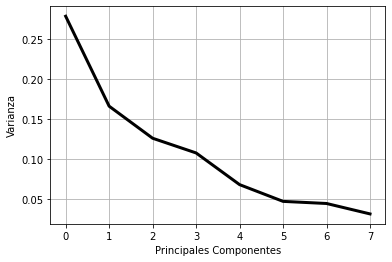

In [ ]:
num_components=8
a = range(num_components)
num_pc= a[::1]

#Visualize 2D Projection
import matplotlib.pyplot as plt

#plt.plot(num_pc, explained_variance)
plt.plot(num_pc, explained_variance, color='black', linestyle='solid', linewidth = 3, 
          markerfacecolor='black', markersize=8)
#plt.ylim((0,0.4))
plt.xlabel('Principales Componentes')
plt.ylabel('Varianza')
plt.grid()
plt.show()



> **Analisis de PCA con 4 componentes**



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(DatasetPreprocesado)

principalDf1 = pd.DataFrame(data = principalComponents)

principalDf1=round(principalDf1, 2)
print(principalDf1)

        0     1     2     3
0    1.79 -0.59 -0.51 -1.32
1    1.97 -0.14  0.74  0.47
2    0.85  0.26 -0.89 -0.57
3    0.83  0.71 -1.22 -0.20
4    0.90  0.08 -0.85 -0.77
..    ...   ...   ...   ...
124 -1.59 -0.30  0.16  0.13
125 -1.25 -0.17  0.20 -0.38
126 -1.52 -0.18  0.24 -0.01
127 -0.58  0.36 -1.28  0.51
128 -1.51 -1.02  0.41 -0.35

[129 rows x 4 columns]


In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.27869893, 0.16626466, 0.12620362, 0.1078275 ])

In [ ]:
#principalDf1[0]
print('Componente 0')
np.corrcoef(principalDf1[0], y)


Componente 0


array([[ 1.        , -0.92994521],
       [-0.92994521,  1.        ]])

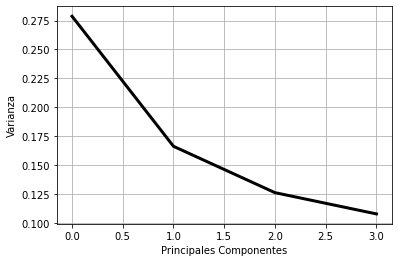

In [ ]:
num_components=4
a = range(num_components)
num_pc= a[::1]

#Visualize 2D Projection
import matplotlib.pyplot as plt

#plt.plot(num_pc, explained_variance)
plt.plot(num_pc, explained_variance, color='black', linestyle='solid', linewidth = 3, 
          markerfacecolor='black', markersize=8)
#plt.ylim((0,0.4))
plt.xlabel('Principales Componentes')
plt.ylabel('Varianza')
plt.grid()
plt.show()

In [ ]:
#Datamining: Clustering (método no supervisado de Machine Learning)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

from sklearn.cluster import KMeans

#Kmeans Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(principalDf1, 3)
kmeans = pd.DataFrame(clust_labels)
kmeans

,0
0,0
1,0
2,0
3,0
4,0
...,...
124,1
125,1
126,1
127,1


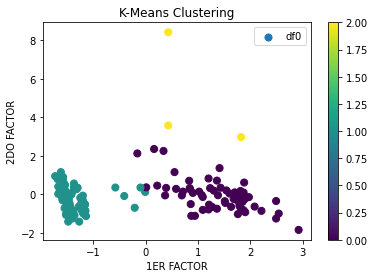

In [ ]:
#Visualización de grupos de usuarios en 2D
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf1[0],principalDf1[1],label='df0',
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
ax.legend()
plt.colorbar(scatter)


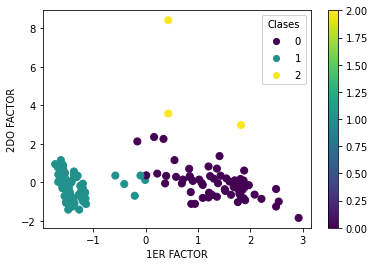

In [ ]:
#Visualización de grupos de usuarios en 2D
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf1[0],principalDf1[1],
                     c=kmeans[0],s=50)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clases")
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
ax.add_artist(legend1)
plt.colorbar(scatter)

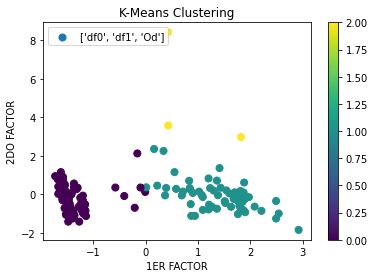

In [ ]:
#Visualización de grupos de usuarios en 2D
fig = plt.figure()
ax = fig.add_subplot(111)
labels = ["df0", "df1", "Od"]
scatter = ax.scatter(principalDf1[0],principalDf1[1],label=labels,
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
ax.legend(loc='upper left')
plt.colorbar(scatter)

In [ ]:
kmeans[0].describe()

count    129.000000
mean       0.542636
std        0.544974
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: 0, dtype: float64

In [ ]:
principalDf1[0].describe()

count    1.290000e+02
mean     4.767935e-16
std      1.448656e+00
min     -1.730000e+00
25%     -1.470000e+00
50%     -1.000000e-02
75%      1.380000e+00
max      2.920000e+00
Name: 0, dtype: float64

In [ ]:
x=principalDf1[0]
np.corrcoef(x,y)

array([[ 1.        , -0.92994521],
       [-0.92994521,  1.        ]])

In [ ]:
x1=principalDf[1]
np.corrcoef(x1,y)

array([[ 1.        , -0.16767478],
       [-0.16767478,  1.        ]])

In [ ]:
x2=principalDf[2]
np.corrcoef(x2,y)

array([[1.        , 0.05928973],
       [0.05928973, 1.        ]])



> **Clustering**



Text(0.5, 0, '3ER FACTOR')

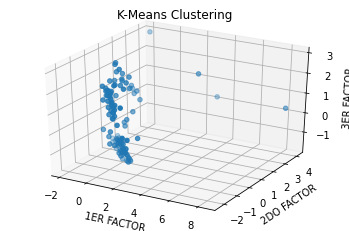

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(-5, 5, 11)
xline = np.linspace(0, 10, 11)
yline = np.linspace(0, 15, 11)
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = principalDf1[0]
xdata = principalDf1[1]
ydata = principalDf1[2]
#ax.scatter3D(xdata, ydata, zdata, c=zdata);
ax.scatter3D(xdata, ydata, zdata);
ax.set_title('K-Means Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
ax.set_zlabel('3ER FACTOR')



> **Red Neuronal de los datos con PCA**



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X = pca.fit_transform(DatasetPreprocesado)

In [ ]:
!pip install -U scikit-learn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#Ahora preparamos el perceptron.Importamos las neuronas simples y el modelo secuencial
#Modelo secuencial quiere decir que agregaremos capas y se conectarán de manera automática, 
#Dense es la librería de neuronas simples.
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
print('Librerías importadas')
print(X_train)
print(y_train)

Librerías importadas
[[-1.47367476e+00 -3.14653929e-01  2.95809050e-01 -1.43725905e-01]
 [-1.51706705e+00 -1.05677963e+00  4.37867813e-01 -3.73564401e-01]
 [ 1.86890805e+00 -8.23552665e-01 -5.21520967e-01 -1.39611916e+00]
 [ 1.78849828e+00 -5.88982912e-01 -5.07804848e-01 -1.32336767e+00]
 [ 8.60184237e-01 -5.03956039e-01  1.45090023e+00  1.45053126e+00]
 [ 1.84665866e+00 -3.79492360e-01  4.67129912e-01  2.84273230e-01]
 [-5.81142185e-01  3.55253725e-01 -1.27944581e+00  5.14190177e-01]
 [ 1.88517155e+00 -2.41990919e-01 -1.85982868e-01  1.11533383e+00]
 [-1.19970876e+00 -9.33574892e-01  4.96215010e-01 -8.77223713e-01]
 [-1.41824806e+00 -4.68503685e-03 -1.79665122e-01  2.24453516e-01]
 [-1.40539265e+00  9.09360446e-02 -7.67757866e-02  1.20505740e-01]
 [ 1.64129110e-01  2.36030394e+00 -2.01368165e+00  1.44119460e+00]
 [-1.37328592e+00  5.72059950e-01 -3.88765100e-01  4.92473299e-01]
 [ 1.89893305e+00 -9.22108137e-01  1.05879651e-01 -3.82819632e-02]
 [ 2.49279863e+00 -3.38100077e-01  2.3937

In [ ]:
#FUNCIONES PARA GuARDAR Y CARGAR CUALQUIER MODELO

#Guardar pesos y la arquitectura de la red en un archivo 

def guardarRNN(model,nombreArchivoModelo,nombreArchivoPesos):
    print("Guardando Red Neuronal en Archivo")  
    # serializar modelo a JSON

    # Guardar los Pesos (weights)
    model.save_weights(nombreArchivoPesos+'.h5')

    # Guardar la Arquitectura del modelo
    with open(nombreArchivoModelo+'.json', 'w') as f:
        f.write(model.to_json())

    print("Red Neuronal Grabada en Archivo")   
    
def cargarRNN(nombreArchivoModelo,nombreArchivoPesos):
        
    # Cargar la Arquitectura desde el archivo JSON
    with open(nombreArchivoModelo+'.json', 'r') as f:
        model = model_from_json(f.read())

    # Cargar Pesos (weights) en el nuevo modelo
    model.load_weights(nombreArchivoPesos+'.h5')  

    print("Red Neuronal Cargada desde Archivo") 
    return model

In [ ]:
from time import time
start_time = time()
#Construcción del Modelo o Arquitectura de Redes Neoronales
model = Sequential()

#La primera capa Dense recibe el numero de variables, que es la segunda dimensión de la matriz X, esto es X_train.shape[1]
#La primera capa tiene 32 neuronas. La función de activación es la función rectificadora.
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
#La segunda capa tiene 64 neuronas. La función de activación es la función rectificadora.
model.add(Dense(64, activation='relu'))
#La capa de salida tiene 1 neurona. La capa de salida debe tener la misma dimensión como de cantidad de salidas queremos,
#por ejemplo, en este caso la salida "Survived" solo requiere 0 y 1. Puesto que 0 o 1 ocupan solo un valor dentro de cada dato,
#entonces 1 neurona es suficiente. La función de activación es sigmoide para clasificación por probabilidad.
model.add(Dense(1, activation='sigmoid'))

#Como tenemos dos posibles salidas "0 o 1", vamos a escoger que el error lo trate como una clasificación binaria, 
#el optimizador será nuestra función derivada que nos ayudará a determinar hacia donde mover los pesos.
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['acc']) #ADADELTA: An Adaptive Learning Rate Method

#imprimir arquitectura de la red
model.summary()

#Entrenamiento: 

#Entrenaremos por 100 epochs, el batch_size es un argumento importante, porque representa cada cuántos datos va a actualizar
#los pesos. Este es el método del gradiente descendiente estocástico que hace el proceso más eficiente y preciso.
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)
score = model.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#Fase de Testing
score = model.evaluate(X_test, y_test, verbose=0)
print('Resultado en Test:')
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#mostrar pesos de la red
#print(model.get_weights())

#Guardar pesos y la arquitectura de la red en un archivo 

nombreArchivoModelo='arquitectura_prueba'
nombreArchivoPesos='pesos_prueba'
guardarRNN(model,nombreArchivoModelo,nombreArchivoPesos)

#Cargar pesos y la arquitectura
model2=cargarRNN(nombreArchivoModelo,nombreArchivoPesos) 

model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['acc']) #ADADELTA: An Adaptive Learning Rate Method
score = model2.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print("%s: %.2f%%" % (model2.metrics_names[1], score[1]*100))

#Fase de Testing
print('Resultado en Test:')
score = model2.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], score[1]*100))
elapsed_time = time() - start_time
print('Tiempo final:')
answer = str(round(elapsed_time, 3))
print(answer)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
Resultado en Train:
acc: 100.00%
Resultado en Test:
acc: 100.00%
Guardando Red Neuronal en Archivo
Red Neuronal Grabada en Archivo
Red Neuronal Cargada desde Archivo
Resultado en Train:
acc: 100.00%
Resultado en Test:
acc: 100.00%
Tiempo final:
1.209




> **Preprocesamiento sin PCA**



In [ ]:
print(DatasetPreprocesado)
#Union=pd.concat([DatasetPreprocesado,dataF['Decisionlabel']])
#Union=pd.merge(DatasetPreprocesado, dataF['Decisionlabel'])
#print('Union')
#print(Union)
print(dataF['Decisionlabel'])
y1 = dataF.Decisionlabel.values

          Age       PO2  ...  History_Kidney cancer  History_None
0    1.100406 -0.454122  ...                    0.0           0.0
1    0.145498  1.854588  ...                    0.0           0.0
2   -0.119754 -0.454122  ...                    0.0           0.0
3   -0.756360 -0.454122  ...                    0.0           0.0
4    0.198549 -0.454122  ...                    0.0           0.0
..        ...       ...  ...                    ...           ...
124  0.145498 -0.454122  ...                    0.0           0.0
125  0.198549 -0.454122  ...                    0.0           0.0
126  0.198549 -0.454122  ...                    0.0           0.0
127 -1.021612 -0.454122  ...                    0.0           0.0
128  0.994305 -0.454122  ...                    0.0           0.0

[129 rows x 37 columns]
0      0
1      0
2      0
3      0
4      0
      ..
125    1
126    1
127    1
128    1
129    1
Name: Decisionlabel, Length: 129, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(DatasetPreprocesado, y1, test_size=.2, random_state=42)

#Ahora preparamos el perceptron.Importamos las neuronas simples y el modelo secuencial
#Modelo secuencial quiere decir que agregaremos capas y se conectarán de manera automática, 
#Dense es la librería de neuronas simples.
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
print('Librerías importadas')
print(X_train)
print(y_train)

Librerías importadas
          Age       PO2  ...  History_Kidney cancer  History_None
70   0.410750 -0.454122  ...                    0.0           0.0
78   1.047356 -0.454122  ...                    0.0           0.0
47   1.312608 -0.454122  ...                    0.0           0.0
0    1.100406 -0.454122  ...                    0.0           0.0
12   0.092448  1.878389  ...                    0.0           0.0
..        ...       ...  ...                    ...           ...
106  0.410750 -0.454122  ...                    0.0           0.0
14  -0.703309  1.878389  ...                    0.0           0.0
92   0.569902 -0.454122  ...                    0.0           0.0
51   0.994305  1.545173  ...                    0.0           0.0
102 -1.764318 -0.454122  ...                    0.0           0.0

[103 rows x 37 columns]
[1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1
 0 1 0 0 1 0



> **Red neuronal de datos sin PCA**



In [ ]:
#FUNCIONES PARA GuARDAR Y CARGAR CUALQUIER MODELO

#Guardar pesos y la arquitectura de la red en un archivo 

def guardarRNN(model,nombreArchivoModelo,nombreArchivoPesos):
    print("Guardando Red Neuronal en Archivo")  
    # serializar modelo a JSON

    # Guardar los Pesos (weights)
    model.save_weights(nombreArchivoPesos+'.h5')

    # Guardar la Arquitectura del modelo
    with open(nombreArchivoModelo+'.json', 'w') as f:
        f.write(model.to_json())

    print("Red Neuronal Grabada en Archivo")   
    
def cargarRNN(nombreArchivoModelo,nombreArchivoPesos):
        
    # Cargar la Arquitectura desde el archivo JSON
    with open(nombreArchivoModelo+'.json', 'r') as f:
        model = model_from_json(f.read())

    # Cargar Pesos (weights) en el nuevo modelo
    model.load_weights(nombreArchivoPesos+'.h5')  

    print("Red Neuronal Cargada desde Archivo") 
    return model

In [ ]:
from time import time
start_time = time()
#Construcción del Modelo o Arquitectura de Redes Neoronales
model = Sequential()

#La primera capa Dense recibe el numero de variables, que es la segunda dimensión de la matriz X, esto es X_train.shape[1]
#La primera capa tiene 32 neuronas. La función de activación es la función rectificadora.
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
#La segunda capa tiene 64 neuronas. La función de activación es la función rectificadora.
model.add(Dense(64, activation='relu'))
#La capa de salida tiene 1 neurona. La capa de salida debe tener la misma dimensión como de cantidad de salidas queremos,
#por ejemplo, en este caso la salida "Survived" solo requiere 0 y 1. Puesto que 0 o 1 ocupan solo un valor dentro de cada dato,
#entonces 1 neurona es suficiente. La función de activación es sigmoide para clasificación por probabilidad.
model.add(Dense(1, activation='sigmoid'))

#Como tenemos dos posibles salidas "0 o 1", vamos a escoger que el error lo trate como una clasificación binaria, 
#el optimizador será nuestra función derivada que nos ayudará a determinar hacia donde mover los pesos.
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['acc']) #ADADELTA: An Adaptive Learning Rate Method

#imprimir arquitectura de la red
model.summary()

#Entrenamiento: 

#Entrenaremos por 100 epochs, el batch_size es un argumento importante, porque representa cada cuántos datos va a actualizar
#los pesos. Este es el método del gradiente descendiente estocástico que hace el proceso más eficiente y preciso.
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)
score = model.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#Fase de Testing
score = model.evaluate(X_test, y_test, verbose=0)
print('Resultado en Test:')
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#mostrar pesos de la red
#print(model.get_weights())

#Guardar pesos y la arquitectura de la red en un archivo 

nombreArchivoModelo='arquitectura_prueba'
nombreArchivoPesos='pesos_prueba'
guardarRNN(model,nombreArchivoModelo,nombreArchivoPesos)

#Cargar pesos y la arquitectura
model2=cargarRNN(nombreArchivoModelo,nombreArchivoPesos) 

model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['acc']) #ADADELTA: An Adaptive Learning Rate Method
score = model2.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print("%s: %.2f%%" % (model2.metrics_names[1], score[1]*100))

#Fase de Testing
print('Resultado en Test:')
score = model2.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], score[1]*100))
elapsed_time = time() - start_time
print('Tiempo final:')
answer = str(round(elapsed_time, 3))
print(answer)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                1216      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________
Resultado en Train:
acc: 100.00%
Resultado en Test:
acc: 100.00%
Guardando Red Neuronal en Archivo
Red Neuronal Grabada en Archivo
Red Neuronal Cargada desde Archivo
Resultado en Train:
acc: 100.00%
Resultado en Test:
acc: 100.00%
Tiempo final:
1.213


In [ ]:
import h5py as h5
hf1 = h5.File("pesos_prueba.h5")
print(hf1)
myfile = h5py.File('pesos_prueba.h5','a')
print(myfile)

<HDF5 file "pesos_prueba.h5" (mode r+)>
<HDF5 file "pesos_prueba.h5" (mode r+)>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  
